In [2]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy import stats

import scipy.integrate as integrate
import scipy.optimize as fitter

#import data
Location = r'dataframe (1).csv'
d = pd.read_csv(Location, index_col = 0, header=0)
df = pd.DataFrame(d)
# remove irrelevant columns
df.drop(df.columns[[2,3,5,8,9,10,11,12,13,15,18,19]], axis=1,inplace=True)
df

,Period (days),V,Radius (Rsun),log Teff (K),log (L/Lsun),Sec Radius (Rsun),Sec Log Teff (K),Sec log (L/Lsun)
System,,,,,,,,
V3903 Sgr,1.744,7.27,8.088 ± 0.086,4.580 ± 0.021,5.087 ± 0.029,6.125 ± 0.060,4.531 ± 0.021,4.658 ± 0.032
V467 Vel,2.753,10.90,9.99 ± 0.09,4.559 ± 0.031,5.187 ± 0.126,3.49 ± 0.03,4.402 ± 0.046,3.649 ± 0.110
CC Cas,3.366,7.08,10.87 ± 0.18,4.538 ± 0.025,5.179 ± 0.053,6.84 ± 0.18,4.452 ± 0.031,4.474 ± 0.064
EM Car,3.414,8.38,9.35 ± 0.17,4.531 ± 0.026,5.02 ± 0.10,8.34 ± 0.14,4.531 ± 0.026,4.92 ± 0.10
δ Cir,3.902,5.09,9.256 ± 0.091,4.574 ± 0.010,5.184 ± 0.070,5.326 ± 0.091,4.519 ± 0.013,4.339 ± 0.090
...,...,...,...,...,...,...,...,...
UScoCTIO 5,34.001,16.19,0.8733 ± 0.0024,3.515 ± 0.013,-1.105 ± 0.053,0.8376 ± 0.0024,3.513 ± 0.013,-1.146 ± 0.059
KOI-126 BC,1.722,-1.00,0.2545 ± 0.0008,3.510 ± 0.005,-2.194 ± 0.020,0.2315 ± 0.0007,3.501 ± 0.005,-2.312 ± 0.020
CM Dra,1.268,12.90,0.2534 ± 0.0019,3.496 ± 0.010,-2.258 ± 0.038,0.2396 ± 0.0015,3.494 ± 0.014,-2.313 ± 0.056


In [3]:
df.dtypes

Period (days)        float64
V                    float64
Radius (Rsun)         object
log Teff (K)          object
log (L/Lsun)          object
Sec Radius (Rsun)     object
Sec Log Teff (K)      object
Sec log (L/Lsun)      object
dtype: object

In [5]:
# Remove all data entries where luminosity or Teff is not available (NaN)
df.dropna(subset=['log (L/Lsun)', 'log Teff (K)'], inplace=True)

# store luminosity column as an array
lum = np.array(df['log (L/Lsun)'])
teff = np.array(df['log Teff (K)'])

# empty array to hold luminosity and Teff values and error values separately
log_lum = []
log_lum_err = []
log_Teff = []
log_Teff_err = []

# convert the column elements (which are strings) into floats
for i in range(len(lum)):
    log_lum.append(float(lum[i][0:5]))
    log_lum_err.append(float(lum[i][-5:]))

    log_Teff.append(float(teff[i][0:6]))
    log_Teff_err.append(float(teff[i][-5:]))

# create new columns for (log) luminosity and (log) Teff and their respective errors
df['log(L/Lsun) Values'] = log_lum
df['log(L/Lsun) Errors'] = log_lum_err

df['log Teff Values'] = log_Teff
df['log Teff Errors'] = log_Teff_err

df

,Period (days),V,Radius (Rsun),log Teff (K),log (L/Lsun),Sec Radius (Rsun),Sec Log Teff (K),Sec log (L/Lsun),log(L/Lsun) Values,log(L/Lsun) Errors,log Teff Values,log Teff Errors
System,,,,,,,,,,,,
V3903 Sgr,1.744,7.27,8.088 ± 0.086,4.580 ± 0.021,5.087 ± 0.029,6.125 ± 0.060,4.531 ± 0.021,4.658 ± 0.032,5.087,0.029,4.580,0.021
V467 Vel,2.753,10.90,9.99 ± 0.09,4.559 ± 0.031,5.187 ± 0.126,3.49 ± 0.03,4.402 ± 0.046,3.649 ± 0.110,5.187,0.126,4.559,0.031
CC Cas,3.366,7.08,10.87 ± 0.18,4.538 ± 0.025,5.179 ± 0.053,6.84 ± 0.18,4.452 ± 0.031,4.474 ± 0.064,5.179,0.053,4.538,0.025
EM Car,3.414,8.38,9.35 ± 0.17,4.531 ± 0.026,5.02 ± 0.10,8.34 ± 0.14,4.531 ± 0.026,4.92 ± 0.10,5.020,0.100,4.531,0.026
δ Cir,3.902,5.09,9.256 ± 0.091,4.574 ± 0.010,5.184 ± 0.070,5.326 ± 0.091,4.519 ± 0.013,4.339 ± 0.090,5.184,0.070,4.574,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...
LSPM J1112+7626,41.033,14.85,0.3860 ± 0.0054,3.486 ± 0.024,-1.92 ± 0.08,0.2978 ± 0.0048,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.080,3.486,0.024
UScoCTIO 5,34.001,16.19,0.8733 ± 0.0024,3.515 ± 0.013,-1.105 ± 0.053,0.8376 ± 0.0024,3.513 ± 0.013,-1.146 ± 0.059,-1.100,0.053,3.515,0.013
KOI-126 BC,1.722,-1.00,0.2545 ± 0.0008,3.510 ± 0.005,-2.194 ± 0.020,0.2315 ± 0.0007,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.020,3.510,0.005


Linear fit:
y = 4.92845x + -17.72529
Quadratic fit:
y = 0.32848x^2 + 2.29501x + -12.47143


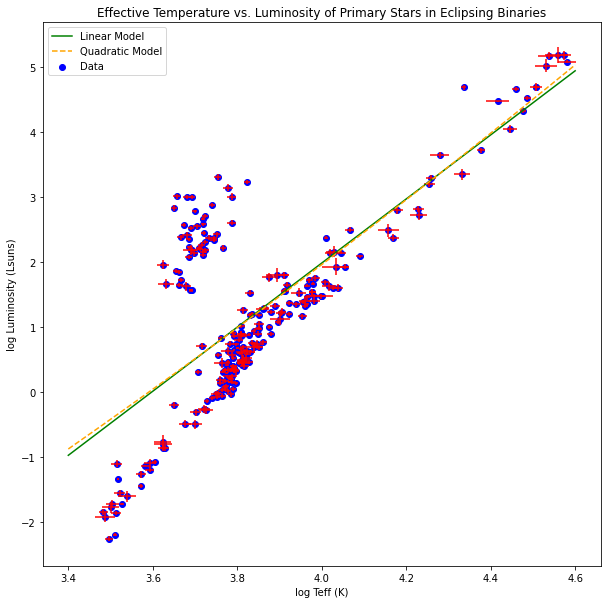

In [57]:
# curve fitting for log Teff vs. log luminosity

# linear fit
def linmodel(x, a, b):
    return a*x + b

par0 = np.array([6, -2]) # initial guess for parameters
par_lin, cov = fitter.curve_fit(linmodel, log_Teff, log_lum, par0) # linear least squares fit

xfit = np.linspace(3.4, 4.6, 250) # x values
print('Linear fit:')
print('y = %.5fx + %.5f' % (par_lin[0], par_lin[1])) # print the equation

# quadratic fit
def quadmodel(x, a, b, c):
    return a*x**2 + b*x + c

par1 = np.array([0, 3.8, 2])
par_quad, cov = fitter.curve_fit(quadmodel, log_Teff, log_lum, par1)

print('Quadratic fit:')
print('y = %.5fx^2 + %.5fx + %.5f' % (par_quad[0], par_quad[1], par_quad[2]))

# plot everything
plt.figure(figsize=(10,10))
plt.plot(xfit,linmodel(xfit,par_lin[0],par_lin[1]),'g-', label='Linear Model')
plt.plot(xfit,quadmodel(xfit,par_quad[0],par_quad[1], par_quad[2]), color = 'orange', ls = "--", label = "Quadratic Model")
plt.scatter(log_Teff, log_lum, color='b', label = 'Data')
plt.errorbar(log_Teff, log_lum, xerr = log_Teff_err, yerr = log_lum_err, color='r',ls='none')
plt.title('Effective Temperature vs. Luminosity of Primary Stars in Eclipsing Binaries')
plt.xlabel('log Teff (K)')
plt.ylabel('log Luminosity (Lsuns)')
plt.legend()
plt.show()

Linear fit:
y = 6.33592x + -23.61069
Quadratic fit:
y = -1.55246x^2 + 18.81178x + -48.56348


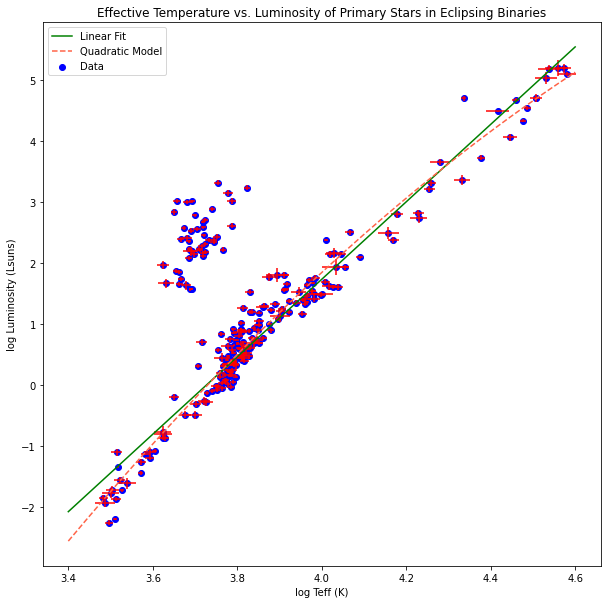

In [44]:
lin_log_lum = []
lin_log_Teff = []

# Determine the array of points excluding the cluster of points away from the main linear points (based on the overall plot)
for i in range(len(lum)):
    if (log_lum[i] <= 1):
        lin_log_lum.append(log_lum[i])
        lin_log_Teff.append(log_Teff[i])
    elif ((log_lum[i] > 1 and log_lum[i] <= 2) and log_Teff[i] > 3.75):
        lin_log_lum.append(log_lum[i])
        lin_log_Teff.append(log_Teff[i])
    elif (log_lum[i] > 2 and log_Teff[i] > 3.9):
        lin_log_lum.append(log_lum[i])
        lin_log_Teff.append(log_Teff[i])

# redetermine linear least squares fit
par2 = np.array([6, -2]) # initial guess for parameters
par_l, cov = fitter.curve_fit(linmodel, lin_log_Teff, lin_log_lum, par2) # linear least squares fit

xfit = np.linspace(3.4, 4.6, 250) # x values
print('Linear fit:')
print('y = %.5fx + %.5f' % (par_l[0], par_l[1])) # print the equation

# redetermine quadratic least squares fit
par3 = np.array([0, 3.8, 2])
par_q, cov = fitter.curve_fit(quadmodel, lin_log_Teff, lin_log_lum, par3)
print('Quadratic fit:')
print('y = %.5fx^2 + %.5fx + %.5f' % (par_q[0], par_q[1], par_q[2]))

plt.figure(figsize=(10,10))
plt.plot(xfit,linmodel(xfit,par_l[0],par_l[1]),'g-', label='Linear Fit')
plt.plot(xfit,quadmodel(xfit,par_q[0],par_q[1], par_q[2]), color = 'tomato', ls = "--", label = "Quadratic Model")
plt.scatter(log_Teff, log_lum, color='b', label = 'Data')
plt.errorbar(log_Teff, log_lum, xerr = log_Teff_err, yerr = log_lum_err, color='r',ls='none')
plt.title('Effective Temperature vs. Luminosity of Primary Stars in Eclipsing Binaries')
plt.xlabel('log Teff (K)')
plt.ylabel('log Luminosity (Lsuns)')
plt.legend()
plt.show()

In [45]:
# Chi squared statistic for linear model

chi_squared = np.sum(((linmodel(df['log Teff Values'], *par_lin)-df['log(L/Lsun) Values'])/df['log(L/Lsun) Errors'])**2)
reduced_chi_squared = (chi_squared)/(len(df['log Teff Values'])-len(par_lin))
print ('chi^2 = {0:5.3}'.format(chi_squared))
print ('chi^2/d.f.={0:5.3}'.format(reduced_chi_squared))

chi^2 = 2.53e+05
chi^2/d.f.=1.04e+03


In [46]:
# Chi squared statistic for quadratic model

chi_squared = np.sum(((quadmodel(df['log Teff Values'], *par_quad)-df['log(L/Lsun) Values'])/df['log(L/Lsun) Errors'])**2)
reduced_chi_squared = (chi_squared)/(len(df['log Teff Values'])-len(par_quad))
print ('chi^2 = {0:5.3}'.format(chi_squared))
print ('chi^2/d.f.={0:5.3}'.format(reduced_chi_squared))

chi^2 = 2.53e+05
chi^2/d.f.=1.04e+03


In [47]:
# R^2 for linear model

sumreg = 0
sumsq = 0
mean_y = np.mean(log_lum)
for i in range(len(lum)):
    sumreg += (log_lum[i] - linmodel(log_Teff[i], par_lin[0], par_lin[1]))**2
    sumsq += (log_lum[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.7840230768943759

In [48]:
# R^2 for quadratic model

sumreg = 0
sumsq = 0
mean_y = np.mean(log_lum)
for i in range(len(lum)):
    sumreg += (log_lum[i] - quadmodel(log_Teff[i], par_quad[0], par_quad[1], par_quad[2]))**2
    sumsq += (log_lum[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.7842662587897635

In [49]:
# R^2 for linear model excluding the cluster

sumreg = 0
sumsq = 0
mean_y = np.mean(lin_log_lum)
for i in range(len(lin_log_lum)):
    sumreg += (lin_log_lum[i] - linmodel(lin_log_Teff[i], par_l[0], par_l[1]))**2
    sumsq += (lin_log_lum[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.9983702567152505

In [50]:
# R^2 for quadratic model excluding the cluster

sumreg = 0
sumsq = 0
mean_y = np.mean(lin_log_lum)
for i in range(len(lin_log_lum)):
    sumreg += (lin_log_lum[i] - quadmodel(lin_log_Teff[i], par_q[0], par_q[1], par_q[2]))**2
    sumsq += (lin_log_lum[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.9988703714084574

In [51]:
# Time to get rid of the logs!

lum_vals = []
lum_errs = []
Teff_vals = []
Teff_errs = []

for i in range(len(lum)):
    lum_vals.append(10**log_lum[i])
    lum_errs.append(10**log_lum_err[i])
    Teff_vals.append(10**log_Teff[i])
    Teff_errs.append(10**log_Teff_err[i])

df['Luminosity (Lsuns)'] = lum_vals
df['Luminosity Errors (Lsuns)'] = lum_errs

df['Teff (K)'] = Teff_vals
df['Teff Errors (K)'] = Teff_errs

df

,Period (days),V,Radius (Rsun),log Teff (K),log (L/Lsun),Sec Radius (Rsun),Sec Log Teff (K),Sec log (L/Lsun),log(L/Lsun) Values,log(L/Lsun) Errors,log Teff Values,log Teff Errors,Luminosity (Lsuns),Luminosity Errors (Lsuns),Teff (K),Teff Errors (K)
System,,,,,,,,,,,,,,,,
V3903 Sgr,1.744,7.27,8.088 ± 0.086,4.580 ± 0.021,5.087 ± 0.029,6.125 ± 0.060,4.531 ± 0.021,4.658 ± 0.032,5.087,0.029,4.580,0.021,122179.966016,1.069055,38018.939632,1.049542
V467 Vel,2.753,10.90,9.99 ± 0.09,4.559 ± 0.031,5.187 ± 0.126,3.49 ± 0.03,4.402 ± 0.046,3.649 ± 0.110,5.187,0.126,4.559,0.031,153815.464030,1.336596,36224.299842,1.073989
CC Cas,3.366,7.08,10.87 ± 0.18,4.538 ± 0.025,5.179 ± 0.053,6.84 ± 0.18,4.452 ± 0.031,4.474 ± 0.064,5.179,0.053,4.538,0.025,151008.015416,1.129796,34514.373934,1.059254
EM Car,3.414,8.38,9.35 ± 0.17,4.531 ± 0.026,5.02 ± 0.10,8.34 ± 0.14,4.531 ± 0.026,4.92 ± 0.10,5.020,0.100,4.531,0.026,104712.854805,1.258925,33962.527259,1.061696
δ Cir,3.902,5.09,9.256 ± 0.091,4.574 ± 0.010,5.184 ± 0.070,5.326 ± 0.091,4.519 ± 0.013,4.339 ± 0.090,5.184,0.070,4.574,0.010,152756.605824,1.174898,37497.300225,1.023293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LSPM J1112+7626,41.033,14.85,0.3860 ± 0.0054,3.486 ± 0.024,-1.92 ± 0.08,0.2978 ± 0.0048,3.470 ± 0.023,-2.21 ± 0.09,-1.920,0.080,3.486,0.024,0.012023,1.202264,3061.963434,1.056818
UScoCTIO 5,34.001,16.19,0.8733 ± 0.0024,3.515 ± 0.013,-1.105 ± 0.053,0.8376 ± 0.0024,3.513 ± 0.013,-1.146 ± 0.059,-1.100,0.053,3.515,0.013,0.079433,1.129796,3273.406949,1.030386
KOI-126 BC,1.722,-1.00,0.2545 ± 0.0008,3.510 ± 0.005,-2.194 ± 0.020,0.2315 ± 0.0007,3.501 ± 0.005,-2.312 ± 0.020,-2.190,0.020,3.510,0.005,0.006457,1.047129,3235.936569,1.011579


Linear fit:
y = 2.57138x + -16839.61474
Quadratic fit:
y = 0.00018x^2 + -3.79517x + 16098.50232
Quartic fit:
y = 707.16383x^4 + -0.40704x^3 + 0.00008x^2 + -0.00000x + 0.00000


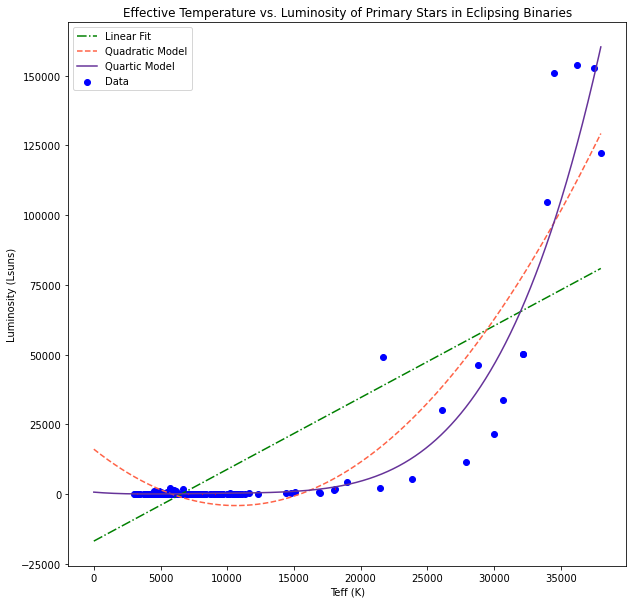

In [52]:
# curve fitting for Teff vs. luminosity

# linear fit

par4 = np.array([3, -20000]) # initial guess for parameters
par_li, cov = fitter.curve_fit(linmodel, Teff_vals, lum_vals, par4) # linear least squares fit

xfit = np.linspace(0, 38000, 50000) # x values
print('Linear fit:')
print('y = %.5fx + %.5f' % (par_li[0], par_li[1])) # print the equation

# quadratic fit

par5 = np.array([0, 3.8, 20000])
par_qu, cov = fitter.curve_fit(quadmodel, Teff_vals, lum_vals, par5)

print('Quadratic fit:')
print('y = %.5fx^2 + %.5fx + %.5f' % (par_qu[0], par_qu[1], par_qu[2]))

def polymodel(*arg):
    x = arg[0]
    N = len(arg)-1
    sum = arg[1]
    for i in range(1,N):
        sum += arg[i+1]*x**i
    return sum

N = 4   # trying 4 degrees
par6    = np.zeros(N+1)
par, cov = fitter.curve_fit(polymodel, Teff_vals, lum_vals, par6)

print('Quartic fit:')
print('y = %.5fx^4 + %.5fx^3 + %.5fx^2 + %.5fx + %.5f' % (par[0], par[1], par[2], par[3], par[4]))

# plot everything
plt.figure(figsize=(10,10))
plt.plot(xfit,linmodel(xfit,par_li[0],par_li[1]),'g-.', label='Linear Fit')
plt.plot(xfit,quadmodel(xfit,par_qu[0],par_qu[1],par_qu[2]), color = 'tomato', ls = "--", label = "Quadratic Model")
plt.plot(xfit,polymodel(xfit,*par), color = 'rebeccapurple', ls = '-', label = "Quartic Model")
plt.scatter(Teff_vals, lum_vals, color='b', label = 'Data')
plt.errorbar(Teff_vals, lum_vals, xerr = Teff_errs, yerr = lum_errs, color='r',ls='none')
plt.title('Effective Temperature vs. Luminosity of Primary Stars in Eclipsing Binaries')
plt.xlabel('Teff (K)')
plt.ylabel('Luminosity (Lsuns)')
plt.legend()
plt.show()

In [53]:
# Poly model chi square statistic

chi_squared = np.sum(((polymodel((df['Teff (K)']), *par)-df['Luminosity (Lsuns)'])/df['Luminosity Errors (Lsuns)'])**2)
reduced_chi_squared = (chi_squared)/(len(df['Teff (K)'])-len(par))
print ('chi^2 = {0:5.3}'.format(chi_squared))
print ('chi^2/d.f.={0:5.3}'.format(reduced_chi_squared))

chi^2 = 7.4e+09
chi^2/d.f.=3.07e+07


In [54]:
# Quad model chi square statistic

chi_squared = np.sum(((quadmodel(df['Teff (K)'], *par_qu)-df['Luminosity (Lsuns)'])/df['Luminosity Errors (Lsuns)'])**2)
reduced_chi_squared = (chi_squared)/(len(df['Teff (K)'])-len(par))
print ('chi^2 = {0:5.3}'.format(chi_squared))
print ('chi^2/d.f.={0:5.3}'.format(reduced_chi_squared))

chi^2 = 1.14e+10
chi^2/d.f.=4.73e+07


In [55]:
# R^2 for quadratic model excluding the cluster

sumreg = 0
sumsq = 0
mean_y = np.mean(lum_vals)

for i in range(len(lum_vals)):
    sumreg += (lum_vals[i] - quadmodel(Teff_vals[i], par_qu[0], par_qu[1], par_qu[2]))**2
    sumsq += (lum_vals[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.9800692686484814

In [56]:
# R^2 for quartic model excluding the cluster

sumreg = 0
sumsq = 0
mean_y = np.mean(lum_vals)

for i in range(len(lum_vals)):
    sumreg += (lum_vals[i] - polymodel(Teff_vals[i], *par))**2
    sumsq += (lum_vals[i] - mean_y)**2
    
rsq = 1-((sumreg)**2/(sumsq)**2)

rsq

0.9919609730153619